In [1]:
#LOAD RELEVANT PACKAGES
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd

In [88]:
df=pd.read_csv("Train.csv")
df=df.replace("NaN", np.nan)
df.dropna()
df=df.drop(["ID","Profession","Var_1"],axis=1)
newindex=[]
for i in df.index: 
    if(sum(df.loc[i].isnull())==0):
        newindex.append(i)
df=df.loc[newindex].reset_index()
df=df.drop("index",axis=1)
print(df)

      Gender Ever_Married  Age Graduated  Work_Experience Spending_Score  \
0       Male           No   22        No              1.0            Low   
1     Female          Yes   67       Yes              1.0            Low   
2       Male          Yes   67       Yes              0.0           High   
3       Male          Yes   56        No              0.0        Average   
4       Male           No   32       Yes              1.0            Low   
...      ...          ...  ...       ...              ...            ...   
6800    Male           No   22        No              0.0            Low   
6801    Male           No   35        No              3.0            Low   
6802  Female           No   33       Yes              1.0            Low   
6803  Female           No   27       Yes              1.0            Low   
6804    Male          Yes   37       Yes              0.0        Average   

      Family_Size Segmentation  
0             4.0            D  
1             1.0    

In [89]:
df['Gender']=df['Gender'].str.replace("Female","0")
df['Gender']=df['Gender'].str.replace("Male","1")
df['Ever_Married']=df['Ever_Married'].str.replace("No","0")
df['Ever_Married']=df['Ever_Married'].str.replace("Yes","1")
df['Graduated']=df['Graduated'].str.replace("No","0")
df['Graduated']=df['Graduated'].str.replace("Yes","1")
df['Spending_Score']=df['Spending_Score'].str.replace("Low","1")
df['Spending_Score']=df['Spending_Score'].str.replace("Average","2")
df['Spending_Score']=df['Spending_Score'].str.replace("High","3")
df['Segmentation']=df['Segmentation'].str.replace("A","1")
df['Segmentation']=df['Segmentation'].str.replace("B","2")
df['Segmentation']=df['Segmentation'].str.replace("C","3")
df['Segmentation']=df['Segmentation'].str.replace("D","4")
df["Gender"]=df["Gender"].astype("int")
df["Ever_Married"]=df["Ever_Married"].astype("int")
df["Graduated"]=df["Graduated"].astype("int")
df["Spending_Score"]=df["Spending_Score"].astype("int")
df["Segmentation"]=df["Segmentation"].astype("int")


In [90]:
df.to_csv('record_data.csv',index=False)

In [75]:
y=np.array(df["Segmentation"])
df=df.drop("Segmentation",axis=1)

In [76]:
X=np.array(df)

In [79]:
ux=np.mean(X,axis=0)
sx=np.std(X,axis=0)
X_norm=(X-ux)/sx
print(np.mean(X_norm,axis=0))
print(np.std(X_norm,axis=0))

[-2.55816268e-17 -7.72669544e-17  1.94211534e-16 -5.32515496e-17
  5.22074016e-17  2.08829606e-18 -1.87424572e-16]
[1. 1. 1. 1. 1. 1. 1.]


                   Gender  Ever_Married       Age  Graduated  Work_Experience  \
Gender           1.000000      0.115300  0.022542  -0.046511        -0.053622   
Ever_Married     0.115300      1.000000  0.568312   0.204051        -0.092711   
Age              0.022542      0.568312  1.000000   0.247284        -0.188743   
Graduated       -0.046511      0.204051  0.247284   1.000000         0.033157   
Work_Experience -0.053622     -0.092711 -0.188743   0.033157         1.000000   
Spending_Score   0.068308      0.616483  0.430411   0.116575        -0.075263   
Family_Size      0.057561     -0.085502 -0.283378  -0.236620        -0.068707   

                 Spending_Score  Family_Size  
Gender                 0.068308     0.057561  
Ever_Married           0.616483    -0.085502  
Age                    0.430411    -0.283378  
Graduated              0.116575    -0.236620  
Work_Experience       -0.075263    -0.068707  
Spending_Score         1.000000     0.095453  
Family_Size           

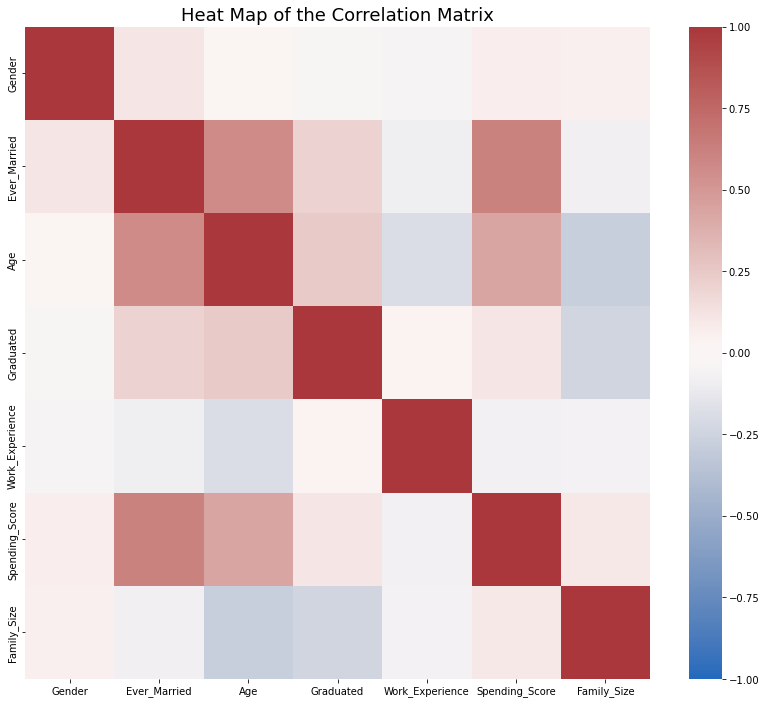

In [81]:
print(df.corr())
fig,axes = plt.subplots(1, 1, num="stars",figsize=(14, 12))
plot1 = sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap="vlag")
plot1.set_title("Heat Map of the Correlation Matrix", fontsize=18)
plt.show()